# **<font color='green'>WORLD HAPPINESS ANALYSIS</font>**

Analyzing the Happiness of Countries over the world. The data is downloaded from **Kaggle** it has the data from **2015 to 2020** contains variables like **Life Expectancy, GDP per Capita, Social Support, Freedom, Happiness Score and Generosity etc.** 

Using the Libraries **Pandas, matplot and Seaborn** for Analysis and Visualizations , 

This Project is truely inspired by **Jovian ML : zerotoPandas** course.

In [1]:
project_name = "zerotopandas-course-project-world-happiness-analysis"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

<IPython.core.display.Javascript object>

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ai/dharmendar-g/zerotopandas-course-project-world-happiness-analysis


<IPython.core.display.Javascript object>

**<font color='grey'>Required Libraries</font>**

In [143]:
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import rcParams
plt.style.use('seaborn-whitegrid')
warnings.simplefilter('ignore')

**Loading the data**

From 2015 to 2020

In [144]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness/2020.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2018.csv


In [145]:
df_2015 = pd.read_csv('../input/world-happiness/2015.csv')
df_2016 = pd.read_csv('../input/world-happiness/2016.csv')
df_2017 = pd.read_csv('../input/world-happiness/2017.csv')
df_2018 = pd.read_csv('../input/world-happiness/2018.csv')
df_2019 = pd.read_csv('../input/world-happiness/2019.csv')
df_2020 = pd.read_csv('../input/world-happiness/2020.csv')

## <font color='orange'>Data Preparation and Cleaning</font>


In [146]:
df_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

**Data Shape** 

In [147]:
print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)
(153, 20)


Shape of each year data is different so filtering the unique columns for feature selection .

**Unique Columns from all the years DataFrames**

In [148]:
frames = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
for index , df in enumerate(frames):
    unique_columns = []
    c = df.columns.values.tolist()
    unique_columns.append(c)
unique_columns

[['Country name',
  'Regional indicator',
  'Ladder score',
  'Standard error of ladder score',
  'upperwhisker',
  'lowerwhisker',
  'Logged GDP per capita',
  'Social support',
  'Healthy life expectancy',
  'Freedom to make life choices',
  'Generosity',
  'Perceptions of corruption',
  'Ladder score in Dystopia',
  'Explained by: Log GDP per capita',
  'Explained by: Social support',
  'Explained by: Healthy life expectancy',
  'Explained by: Freedom to make life choices',
  'Explained by: Generosity',
  'Explained by: Perceptions of corruption',
  'Dystopia + residual']]

Here 20 unique columns are present in all the years of data so now selecting the features which is common in all the dataframes 

**Common Columns in All the dataframes**

In [149]:
for i in range(5):
    common_cols = [c for c in frames[i].columns.tolist() if c not in unique_columns]
common_cols

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

Now these are the columns commonly present in all the years dataframes so selecting these variables for our analysis.

In [150]:
df_2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

Here the same columns of all the dataframes is named as differently so before going to feature selection renaming the column names.

In [151]:
df_15 = df_2015.rename(columns = {'Country':'country',
                                    'Happiness Score':'happiness_score',
                                    'Economy (GDP per Capita)':'gdp_per_capita',
                                    'Family':'social_support',
                                    'Health (Life Expectancy)':'life_expectancy',
                                    'Freedom':'freedom',
                                    'Trust (Government Corruption)':'perceptions_of_corruption',})
df_16 = df_2016.rename(columns = {'Country':'country',
                                    'Happiness Score':'happiness_score',
                                    'Economy (GDP per Capita)':'gdp_per_capita',
                                    'Family':'social_support',
                                    'Health (Life Expectancy)':'life_expectancy',
                                    'Freedom':'freedom',
                                    'Trust (Government Corruption)':'perceptions_of_corruption',})
df_17 = df_2017.rename(columns = {'Country':'country',
                                    'Happiness.Score':'happiness_score',
                                    'Economy..GDP.per.Capita.':'gdp_per_capita',
                                    'Family':'social_support',
                                    'Health..Life.Expectancy.':'life_expectancy',
                                    'Freedom':'freedom',
                                    'Trust..Government.Corruption.':'perceptions_of_corruption',})
df_18 = df_2018.rename(columns = {'Country or region':'country',
                                    'Score':'happiness_score',
                                    'GDP per capita':'gdp_per_capita',
                                    'Social support':'social_support',
                                    'Healthy life expectancy':'life_expectancy',
                                    'Freedom to make life choices':'freedom',
                                    'Perceptions of corruption':'perceptions_of_corruption',})
df_19 = df_2019.rename(columns = {'Country or region':'country',
                                    'Score':'happiness_score',
                                    'GDP per capita':'gdp_per_capita',
                                    'Social support':'social_support',
                                    'Healthy life expectancy':'life_expectancy',
                                    'Freedom to make life choices':'freedom',
                                    'Perceptions of corruption':'perceptions_of_corruption',})
df_20 = df_2020.rename(columns = {'Country name':'country',
                                    'Ladder score':'happiness_score',
                                    'Explained by: Log GDP per capita':'gdp_per_capita',
                                    'Social support':'social_support',
                                    'Explained by: Healthy life expectancy':'life_expectancy',
                                    'Freedom to make life choices':'freedom',
                                    'Perceptions of corruption':'perceptions_of_corruption',})

Now Selecting the common columns of all the datasets 

In [152]:
selected_columns = ['country','happiness_score','gdp_per_capita','social_support','life_expectancy','freedom','perceptions_of_corruption','Generosity']

In [153]:
df_15 = df_15[selected_columns]
df_16 = df_16[selected_columns]
df_17 = df_17[selected_columns]
df_18 = df_18[selected_columns]
df_19 = df_19[selected_columns]
df_20 = df_20[selected_columns]

Here adding the one more column to specify the year , so then we can concatinate all the dataframes as single one.

In [154]:
df_15['year'] = 'YEAR_2015'
df_16['year'] = 'YEAR_2016'
df_17['year'] = 'YEAR_2017'
df_18['year'] = 'YEAR_2018'
df_19['year'] = 'YEAR_2019'
df_20['year'] = 'YEAR_2020'

**Concatinating the data** 

In [155]:
df = pd.concat([df_15,df_16,df_17,df_18,df_19,df_20], ignore_index=True)
df

country  happiness_score  gdp_per_capita  \
0                 Switzerland           7.5870        1.396510   
1                     Iceland           7.5610        1.302320   
2                     Denmark           7.5270        1.325480   
3                      Norway           7.5220        1.459000   
4                      Canada           7.4270        1.326290   
..                        ...              ...             ...   
930  Central African Republic           3.4759        0.041072   
931                    Rwanda           3.3123        0.343243   
932                  Zimbabwe           3.2992        0.425564   
933               South Sudan           2.8166        0.289083   
934               Afghanistan           2.5669        0.300706   

     social_support  life_expectancy   freedom  perceptions_of_corruption  \
0          1.349510         0.941430  0.665570                   0.419780   
1          1.402230         0.947840  0.628770                   0.141450   
2          1.360580         0.874640  0.649380                   0.483570   
3          1.330950         0.885210  0.669730                   0.365030   
4          1.322610         0.905630  0.632970                   0.329570   
..              ...              ...       ...                        ...   
930        0.319460         0.000000  0.640881                   0.891807   
931        0.540835         0.572383  0.900589                   0.183541   
932        0.763093         0.375038  0.711458                   0.810237   
933        0.553707         0.208809  0.451314                   0.763417   
934        0.470367         0.266052  0.396573                   0.933687   

     Generosity       year  
0      0.296780  YEAR_2015  
1      0.436300  YEAR_2015  
2      0.341390  YEAR_2015  
3      0.346990  YEAR_2015  
4      0.458110  YEAR_2015  
..          ...        ...  
930    0.082410  YEAR_2020  
931    0.055484  YEAR_2020  
932   -0.072064  YEAR_2020  
933    0.016519  YEAR_2020  
934   -0.096429  YEAR_2020  

[935 rows x 9 columns]

**Missing Values**

In [156]:
df.isnull().sum()

country                      0
happiness_score              0
gdp_per_capita               0
social_support               0
life_expectancy              0
freedom                      0
perceptions_of_corruption    1
Generosity                   0
year                         0
dtype: int64

Since there is only one missing value that can be filled with some related value , in our case filling zero


In [157]:
df = df.fillna(0)
df.isnull().sum()

country                      0
happiness_score              0
gdp_per_capita               0
social_support               0
life_expectancy              0
freedom                      0
perceptions_of_corruption    0
Generosity                   0
year                         0
dtype: int64

**Final Processed Data**

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    935 non-null    object 
 1   happiness_score            935 non-null    float64
 2   gdp_per_capita             935 non-null    float64
 3   social_support             935 non-null    float64
 4   life_expectancy            935 non-null    float64
 5   freedom                    935 non-null    float64
 6   perceptions_of_corruption  935 non-null    float64
 7   Generosity                 935 non-null    float64
 8   year                       935 non-null    object 
dtypes: float64(7), object(2)
memory usage: 65.9+ KB


In [159]:
import jovian

In [160]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/dharmendar-g/zerotopandas-course-project-world-happiness-analysis


<IPython.core.display.Javascript object>

## <font color='orange'>Exploratory Analysis and Visualizations</font>



In [161]:
df.describe()

happiness_score  gdp_per_capita  social_support  life_expectancy  \
count       935.000000      935.000000      935.000000       935.000000   
mean          5.394436        0.908311        1.034264         0.625581   
std           1.124935        0.402023        0.321210         0.250900   
min           2.566900        0.000000        0.000000         0.000000   
25%           4.540000        0.600264        0.819085         0.449596   
50%           5.353500        0.974380        1.035160         0.667465   
75%           6.198500        1.228785        1.281237         0.814710   
max           7.808700        2.096000        1.644000         1.141000   

          freedom  perceptions_of_corruption  Generosity  
count  935.000000                 935.000000  935.000000  
mean     0.472008                   0.224741    0.180425  
std      0.201962                   0.254915    0.153977  
min      0.000000                   0.000000   -0.300907  
25%      0.337772                   0.061000    0.098152  
50%      0.465820                   0.110690    0.183000  
75%      0.585785                   0.285090    0.262000  
max      0.974998                   0.935585    0.838075

### Outliers

Outliers can be easily shown by boxplots


In [162]:
numerical_cols = df.select_dtypes(include=['float'])
numerical_cols.head(3)

happiness_score  gdp_per_capita  social_support  life_expectancy  freedom  \
0            7.587         1.39651         1.34951          0.94143  0.66557   
1            7.561         1.30232         1.40223          0.94784  0.62877   
2            7.527         1.32548         1.36058          0.87464  0.64938   

   perceptions_of_corruption  Generosity  
0                    0.41978     0.29678  
1                    0.14145     0.43630  
2                    0.48357     0.34139

**Boxplots:**

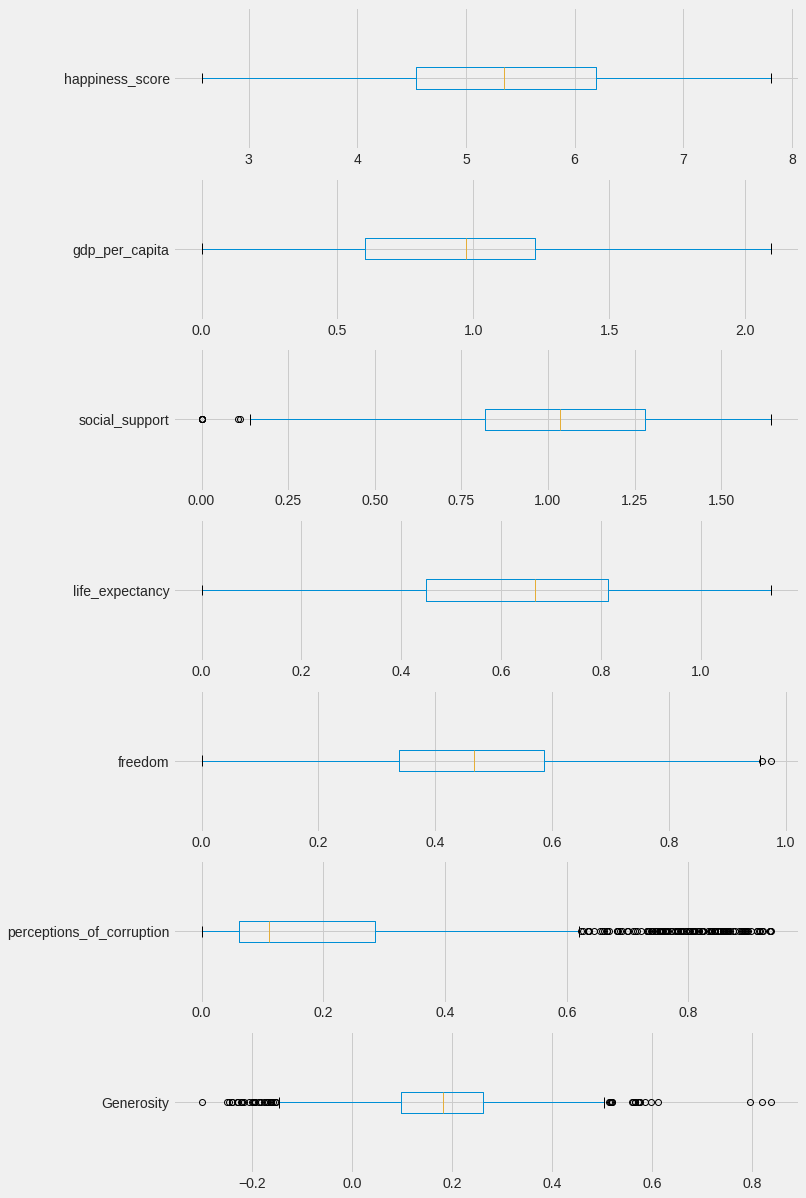

In [163]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(7, 1, figsize=(10, 20))
for i, c in enumerate(numerical_cols):
  _ = df[[c]].boxplot(ax=axes[i], vert=False)

Boxplot showing some outliers in Perceptions of Corruption and Generosity but we cant say that's true because corruption and man kind may change in day by day, so we are going to see that in different visualizations.

**Distplots** 

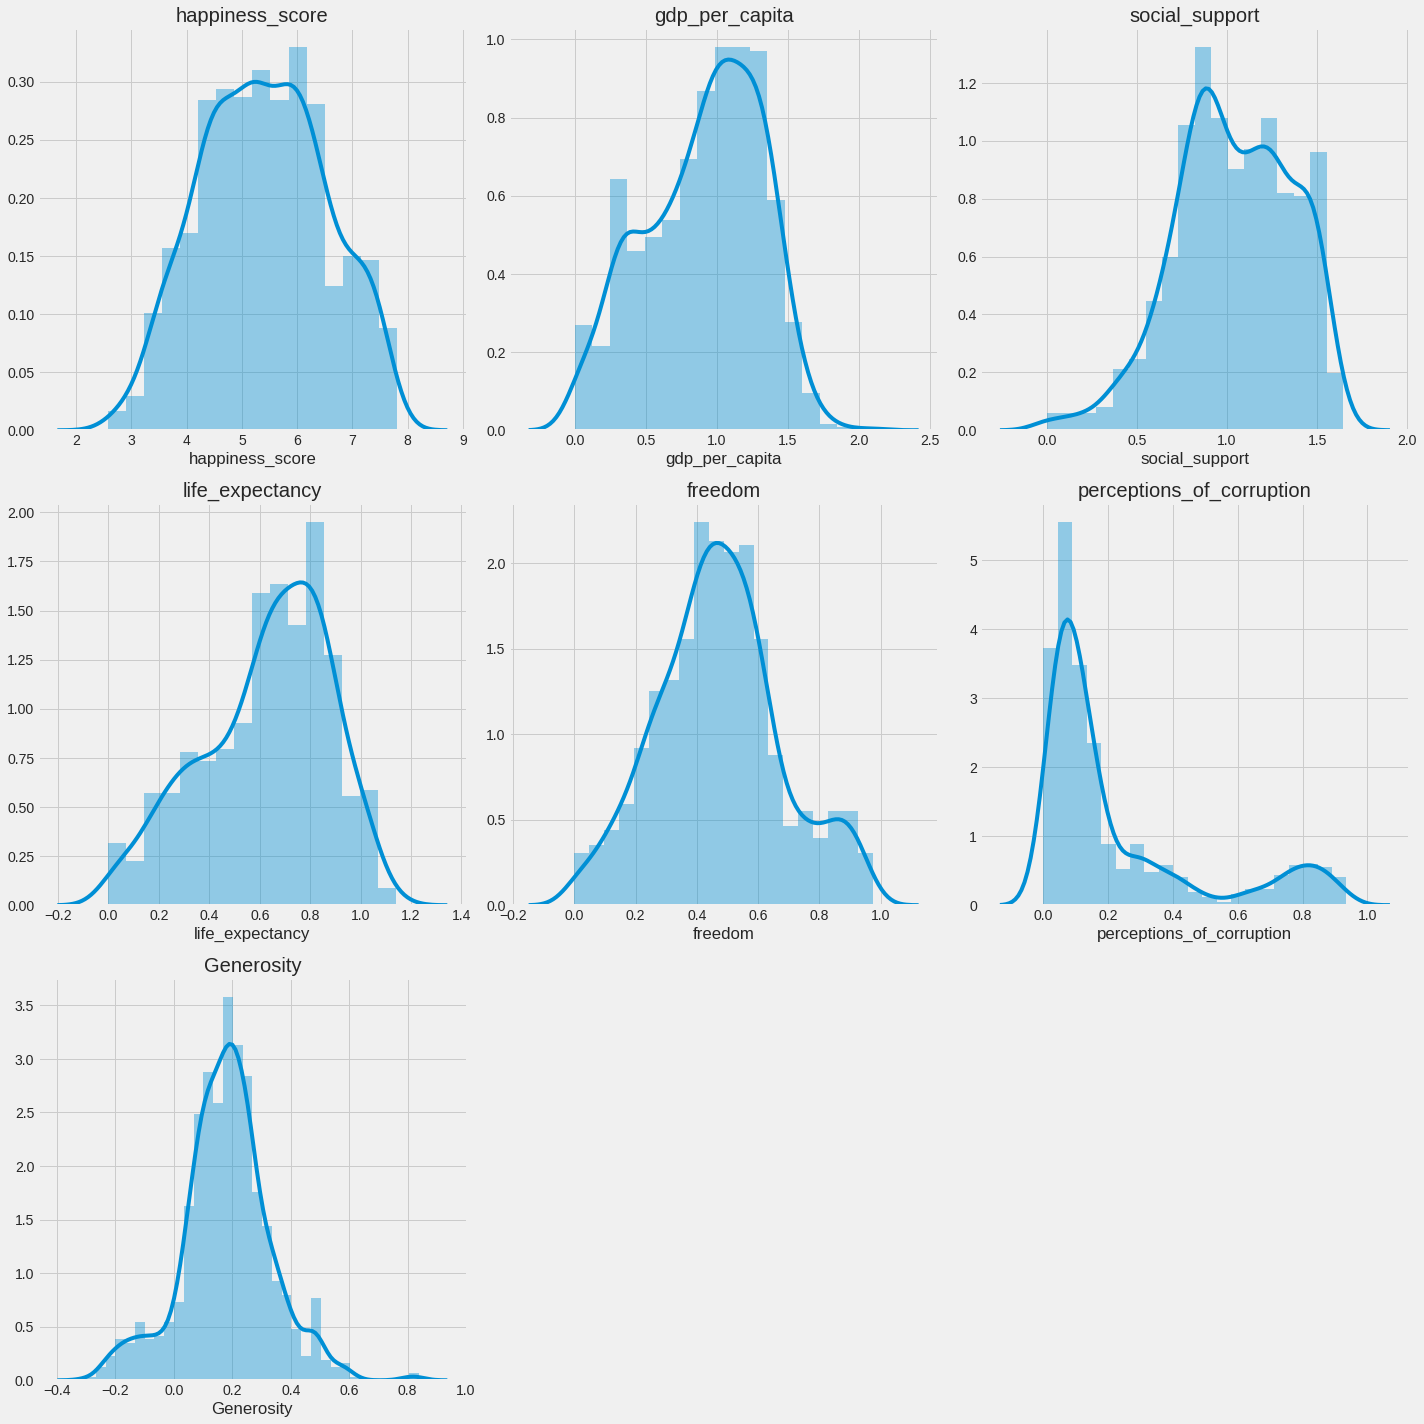

In [164]:
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3 ,i+1)
    sns.distplot(df[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(20, 20)
    plt.tight_layout()

Distplot shows us the distribution of numerical data , for example if we see in **freedom** plot it describes the most of the countries having the freedom of **4 to 6**.

**Barplots**

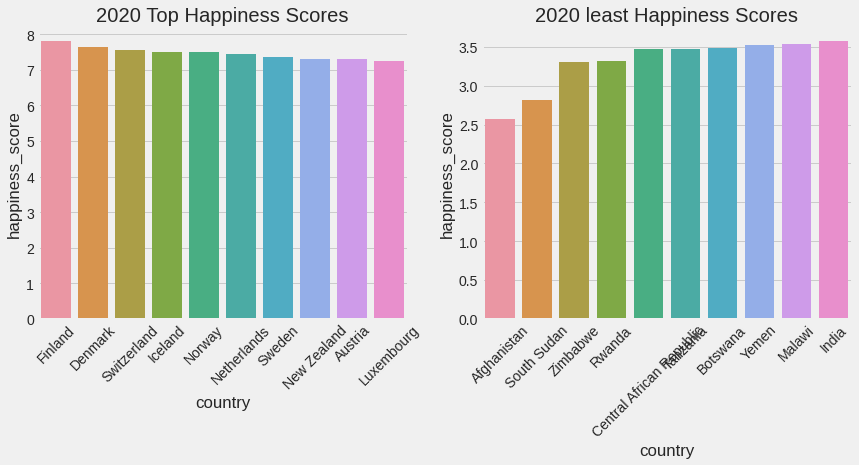

In [165]:
fig, ax = plt.subplots(ncols=2, figsize=(13,5))
sns.barplot(x='country',y='happiness_score',data=df.groupby('year').get_group('YEAR_2020').sort_values('happiness_score',ascending=False).head(10), ax=ax[0])
sns.barplot(x='country',y='happiness_score',data=df.groupby('year').get_group('YEAR_2020').sort_values('happiness_score',ascending=True).head(10), ax=ax[1])
ax[0].set_title('2020 Top Happiness Scores')
ax[1].set_title('2020 least Happiness Scores')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

Using barplots showing the happiness scores of countries across the world in 2020 , first plot has **Top 10 Highest Happiness Scored Countries** and the second plot has **10 Least happiness scored countries** 

**Histograms** 

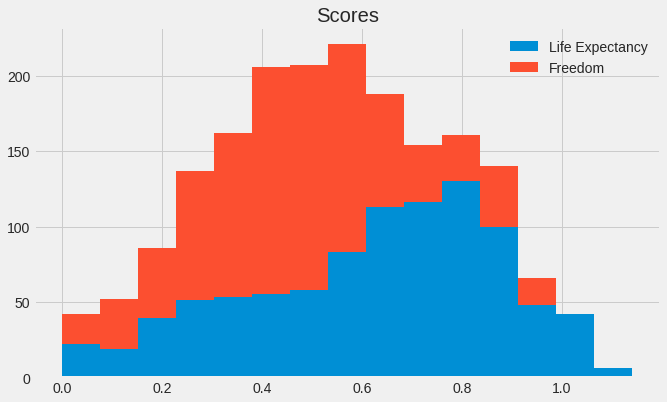

In [166]:
plt.figure(figsize=(10,6))
plt.title('Scores')
plt.hist([df.life_expectancy, df.freedom],bins=15, stacked=True)
plt.legend(['Life Expectancy', 'Freedom']);

Using Histogram showing the distribution of **Life Expectancy** and **Freedom** across the world . 

**Piechart**

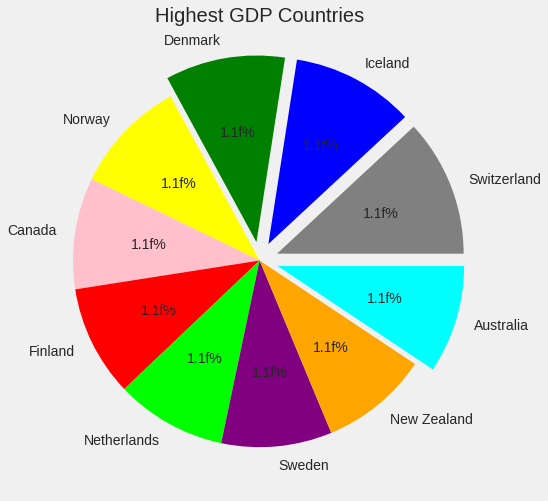

In [167]:
colors = ['grey','blue','green','yellow','pink','red','lime','purple','orange','cyan']
explode = [0.1,0.1,0.1,0,0,0,0,0,0,0.1]
highest_gdp_countries = df.sort_values('gdp_per_capita', ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(highest_gdp_countries.gdp_per_capita, explode=explode, labels=df['country'].head(10), colors=colors, autopct='1.1f%%')
plt.title('Highest GDP Countries')
plt.show()

Piecharts shows us the 10 top gdp value countries across the world.

**Relplot**

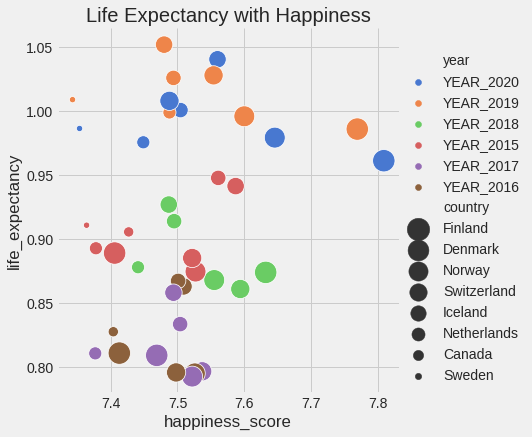

In [168]:
sns.relplot(x='happiness_score', y='life_expectancy', hue='year', size='country',
            sizes=(40,500), palette='muted', height=6, 
            data=df.sort_values('happiness_score',ascending=False).head(40))
plt.title('Life Expectancy with Happiness');

The larger circles shows us the top life expectancy and happiest countries yearly.

**Spearman Correlation Plot** 

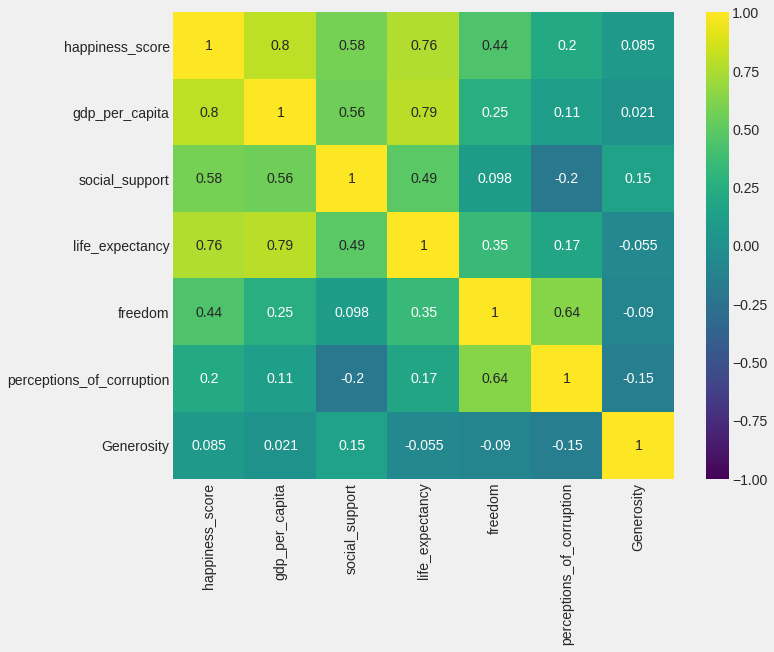

In [169]:
spearman_cormatrix= df.corr(method='spearman')

fig, ax = plt.subplots(nrows=1,figsize=(10, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True);

This correlation plot shows the relation between the variables , relation in the sense whether the one variable is positively or negatively correlated or else there is no correlation. 

In this example **Life Expectancy** is Highly correlated with **GDP Per Capita** and **Happiness_score** is also highly correlated with **Life Expectancy** in a positive direction.

**Pair plot**

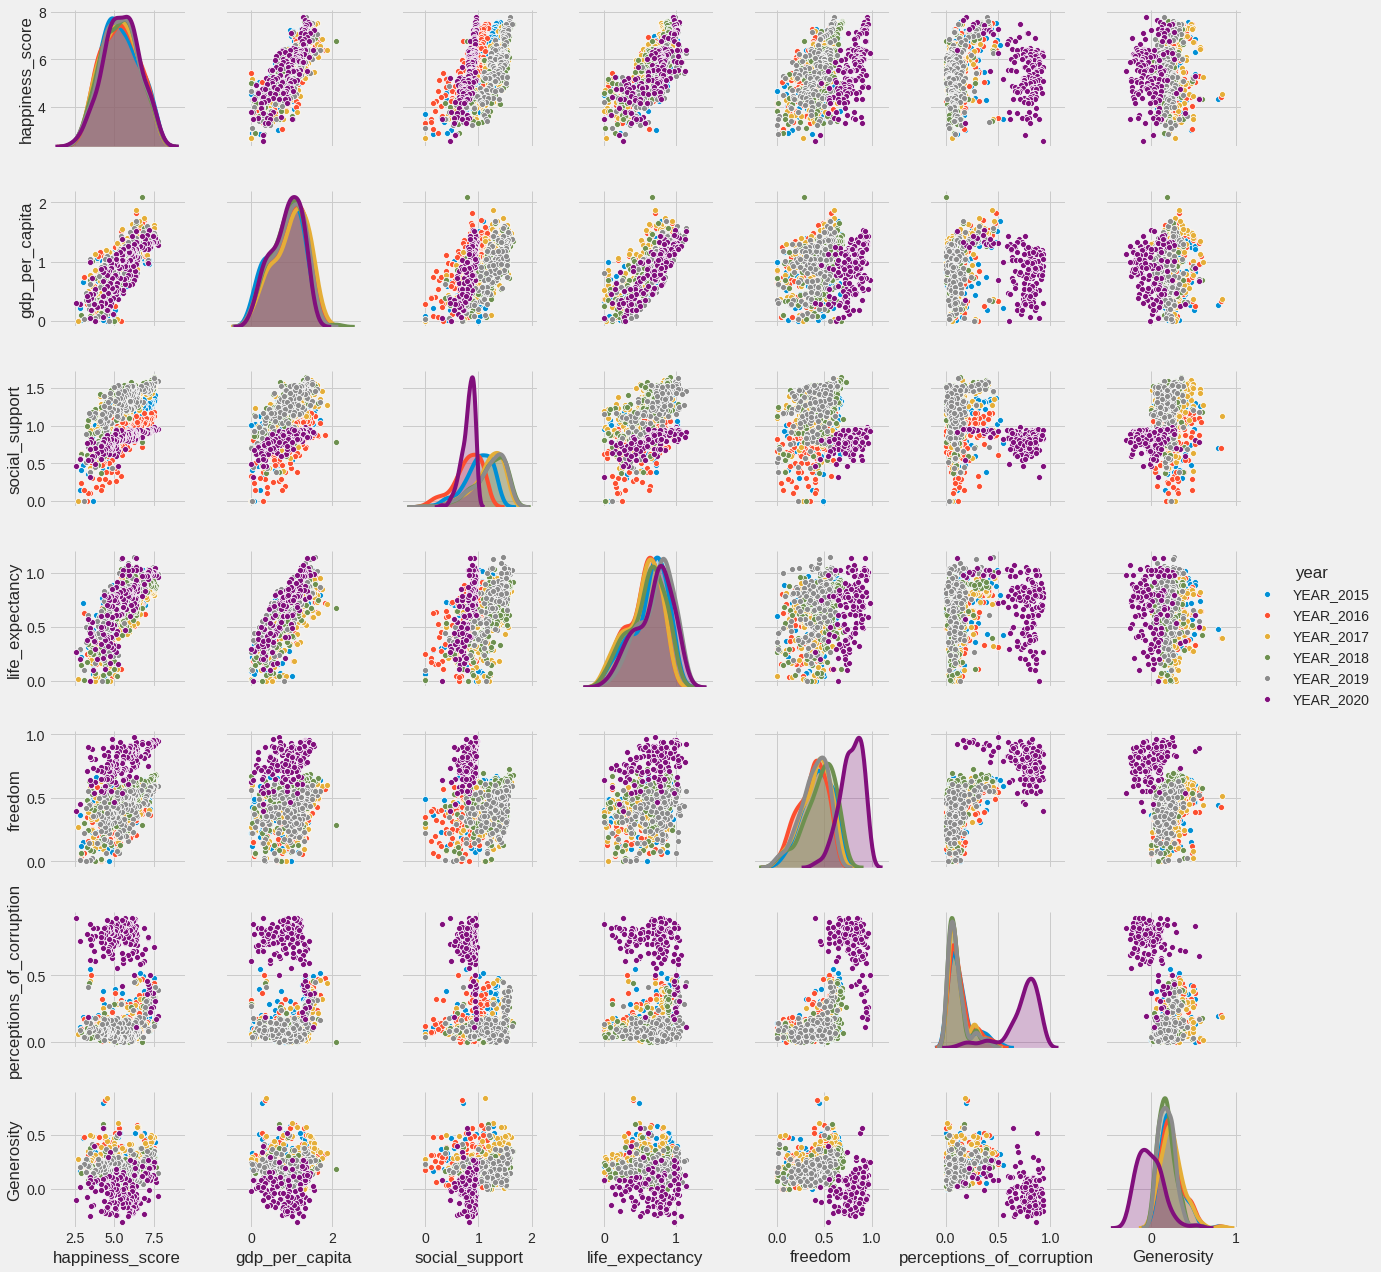

In [170]:
sns.pairplot(df, hue='year');

Pairplot used to plot the pairwise relationships of data.

In [171]:
import jovian

In [172]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/dharmendar-g/zerotopandas-course-project-world-happiness-analysis


<IPython.core.display.Javascript object>

## <font color='blue'>Asking and Answering Questions</font>

**1.How Happiness affecting on Life Expectancy of people ? and is there any relationship between GDP value and Happiness ?**

**2.How the Kindness(Generosity) in people going on nowadays ? when compared to past days.**

**3.Is social support or family support helps in increasing livelihood of people ?**

**4.Are people increasing their life span by being happy?**

**5.The Trust Government Corruption has increased or reduced ? if Increased then how it affects on people life ?**

Now for all the above questions, drawing some insights using some visualizations .

### 1.How Happiness affecting on Life Expectancy of people ? and is there any relationship between GDP value and Happiness ?

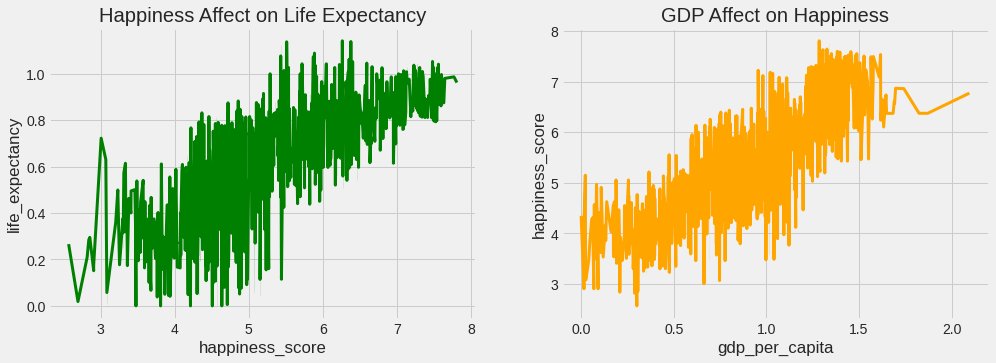

In [173]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.lineplot(x='happiness_score', y='life_expectancy', ax=ax[0], data=df, color='green', linewidth=3)
sns.lineplot(x='gdp_per_capita', y='happiness_score', ax=ax[1], data=df, color='orange', linewidth=3)
ax[0].set_title('Happiness Affect on Life Expectancy')
ax[1].set_title('GDP Affect on Happiness');

By the Above figure(1) we can see that the increasing of people happiness will increasing the life expectancy of people. so we can understand that the People who are happy are also living a long life.

And the figure(2) shows us the increasing GDP values is also increasing the Happiness score. So that the Increasing GDP value may be a reason of people happiness.  

### 2.How the Kindness(Generosity) in people going on nowadays ? when compared to past days.

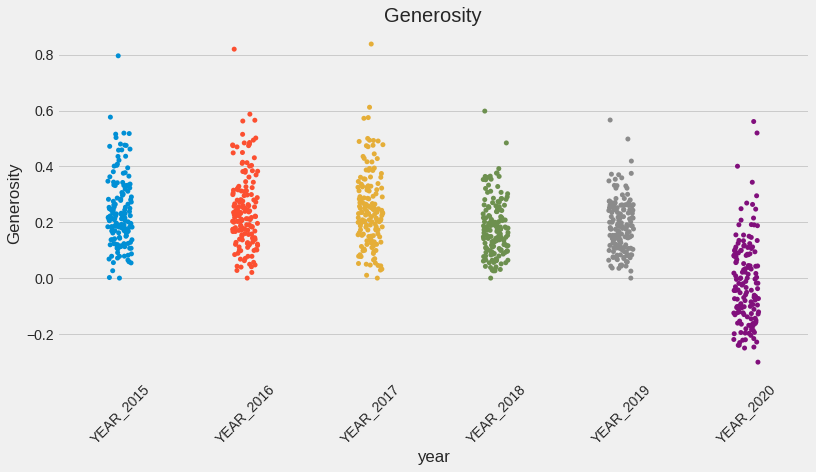

In [174]:
plt.figure(figsize=(12,6))
sns.stripplot(x='year', y='Generosity', data=df, jitter=True)
plt.title('Generosity')
plt.xticks(rotation=45);

The Kindness in people is decreasing yearly as we know everyone becoming selfish these days particulary in the year 2020 seems like there is drastical change in humanity it might be the reason of pandemic .

### 3.Is social support or family support helps in increasing livelihood of people ?

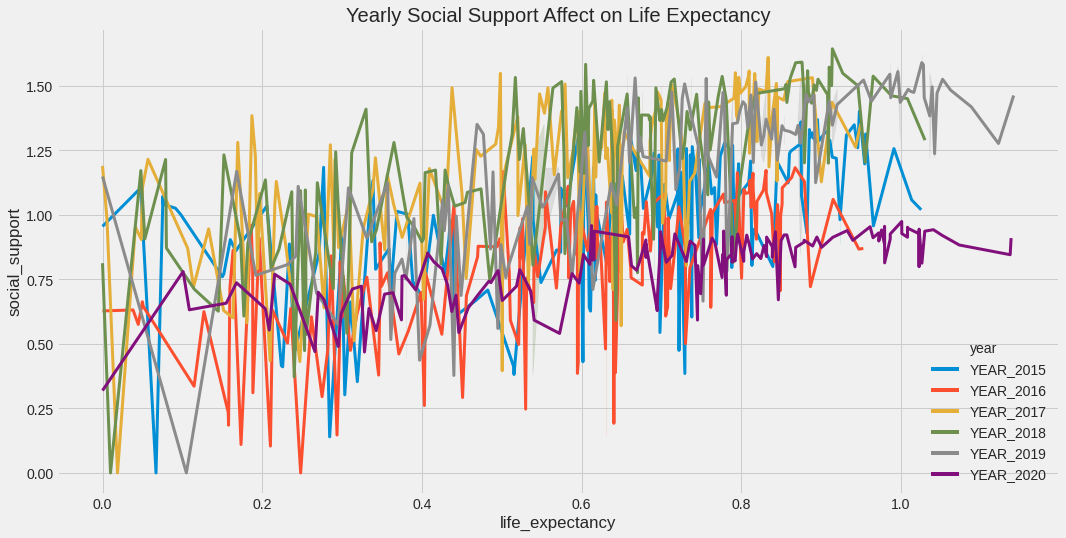

In [175]:
fig, ax = plt.subplots(1, figsize=(16,8))
ax.set_title('Yearly Social Support Affect on Life Expectancy')
sns.lineplot(x='life_expectancy', y='social_support', hue='year',linewidth=3, data=df);

Social support or family support increasing the life expectancy of people. So everyone needs support from their family or others to increase their livelihood.  

### 4.Are people increasing their life span by being happy?

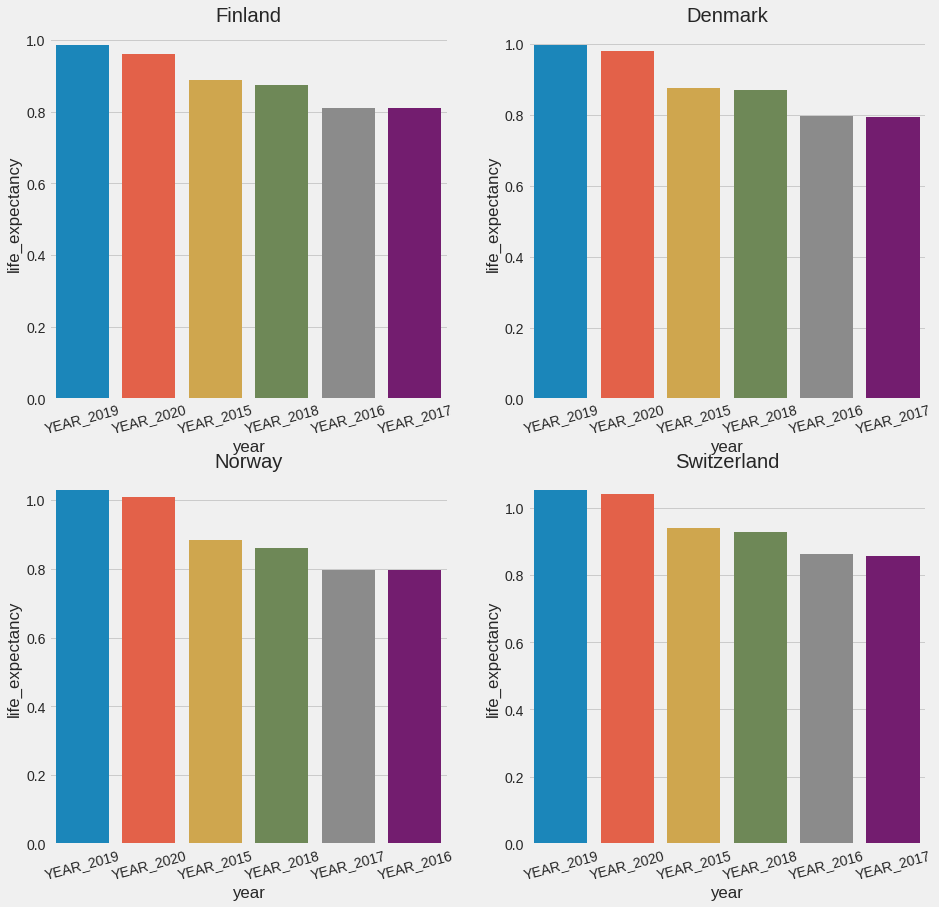

In [176]:
fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(14,14))
sns.barplot('year', 'life_expectancy',ax=ax[0,0], data=df.groupby('country').get_group('Finland').sort_values('life_expectancy', ascending=False))
sns.barplot('year', 'life_expectancy',ax=ax[0,1], data=df.groupby('country').get_group('Denmark').sort_values('life_expectancy', ascending=False))
sns.barplot('year', 'life_expectancy',ax=ax[1,0], data=df.groupby('country').get_group('Norway').sort_values('life_expectancy', ascending=False))
sns.barplot('year', 'life_expectancy',ax=ax[1,1], data=df.groupby('country').get_group('Switzerland').sort_values('life_expectancy', ascending=False))

ax[0,0].set_title('Finland')
ax[0,1].set_title('Denmark')
ax[1,0].set_title('Norway')
ax[1,1].set_title('Switzerland')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=15)

Here are the Top 4 Happiest countries, which are **1.Finland , 2.Denmark, 3.Norway, 4.Switzerland and etc.** Comparing the life expectancy yearly they are increasing their life span by being happy. So we can extend our life a little long by leading a happy life.

### 5.The Trust Government Corruption has increased or reduced ? if Increased then how it affects on people lives ?

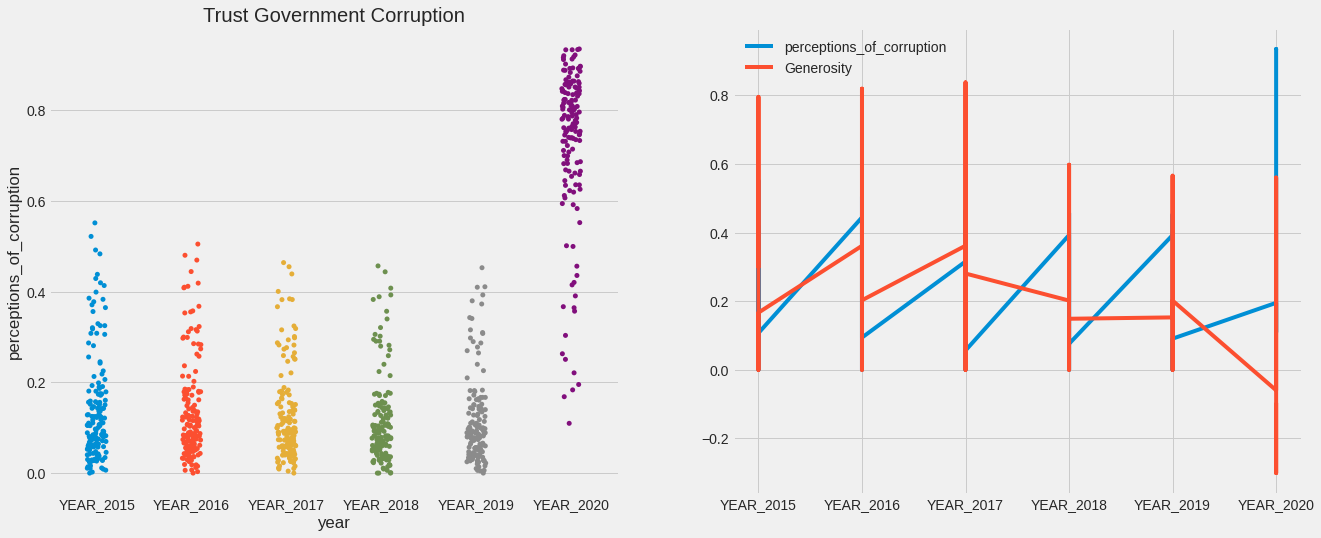

In [177]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].set_title('Trust Government Corruption')
sns.stripplot(x='year', y='perceptions_of_corruption',ax=ax[0], data=df)
plt.plot(df.year, df.perceptions_of_corruption);plt.plot(df.year, df.Generosity);plt.legend(['perceptions_of_corruption', 'Generosity']);

Government Corruption has increased extremely in 2020 when compared to the previous years ,but things got reversed in this pandemic year. so there may be a different reasons for this increased corruption.

By looking at the second plot the increasing corruption is affecting the Generosity (Kindness in people). from above conclusions we saw that the mankind is decreasing day by day so the increasing corruption might be one of the reason. 


In [178]:
import jovian

In [179]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/dharmendar-g/zerotopandas-course-project-world-happiness-analysis


<IPython.core.display.Javascript object>

## <font color='brown'>Inferences and Conclusion</font>



By the Overall analysis:

* People can Extend their life span by being happy. Since the top happiest countries are **Finland, Denmark, Norway, Switzerland , Iceland , Sweden and Etc.**

* Increasing GDP value is one of the reason for people happiness.

* The life expectancy is pretty good when there is a social support or family support.

* The Generosity (Mankind) is decreasing day by day.

* The Corruption is increasing mostly from the last 12 months and this corruption affecting the generosity.

### <font color='silver'>Conclusion:</font>

  The happiness extending the life span of people a little long than the normal life so the simple thing is be happy at any cost .And the support from either by family or society is extremely helpul for everyone so helping each other is always a good thing.
  The corruption is affecting the mankind ,people loosing their trust and generosity .So corruption can't be accepted in any situation.
The Increasing GDP value really making people happy as it makes sense because the growth of real gdp is a sign that the economy is doing well.


In [180]:
import jovian

In [181]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/dharmendar-g/zerotopandas-course-project-world-happiness-analysis


<IPython.core.display.Javascript object>

## <font color='lime'>References and Future Work</font>



https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas


Add some other facts to get more insights about the people happiness and life expectancy

The other Factors like Air Quality , Health Conditions , their Food routien and any other data which you can believe.

In [182]:
import jovian

In [183]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/dharmendar-g/zerotopandas-course-project-world-happiness-analysis


<IPython.core.display.Javascript object>